Implementación de las Hipótesis


Hipotesis 1 
Relación Entre el Tipo de Contrato y la Tasa de Cancelación


El objetivo de este análisis es evaluar si el tipo de contrato tiene una relación significativa con la tasa de cancelación de clientes. Utilizaremos una prueba de chi-cuadrado para analizar la asociación entre estas dos variables categóricas.

Para realizar la prueba de Chi-cuadrado para la relación entre el tipo de contrato y la tasa de cancelación, necesitamos construir una tabla de contingencia que muestre las frecuencias de cancelaciones (y no cancelaciones) por cada tipo de contrato.

In [1]:
import pandas as pd

#Ruta
path = '/datasets/final_provider/'


contract_data = pd.read_csv(path + 'contract.csv')
personal_data = pd.read_csv(path + 'personal.csv')
internet_data = pd.read_csv(path + 'internet.csv')
phone_data = pd.read_csv(path + 'phone.csv')

print("Contract Data Columns:", contract_data.columns.tolist())
print("Personal Data Columns:", personal_data.columns.tolist())
print("Internet Data Columns:", internet_data.columns.tolist())
print("Phone Data Columns:", phone_data.columns.tolist())

Contract Data Columns: ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Personal Data Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
Internet Data Columns: ['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Phone Data Columns: ['customerID', 'MultipleLines']


In [2]:

import pandas as pd

# Verificar valores únicos en las columnas relevantes
print(contract_data['Type'].unique())
print(contract_data['EndDate'].unique())

# Crear una nueva columna para indicar si el contrato fue cancelado
contract_data['Churn'] = contract_data['EndDate'].apply(lambda x: 'Yes' if x != 'No' else 'No')

# Crear la tabla de contingencia
contingency_table = pd.crosstab(contract_data['Type'], contract_data['Churn'])

# Visualizar la tabla
print(contingency_table)




['Month-to-month' 'One year' 'Two year']
['No' '2019-12-01 00:00:00' '2019-11-01 00:00:00' '2019-10-01 00:00:00'
 '2020-01-01 00:00:00']
Churn             No   Yes
Type                      
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


In [3]:
from scipy.stats import chi2_contingency

# Realizar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar resultados
print("Estadístico de Chi-cuadrado:", chi2)
print("Grados de libertad:", dof)
print("Valor p:", p)

# Evaluar el valor p
if p < 0.05:
    print("Existe una relación significativa entre el tipo de contrato y la tasa de cancelación (rechazamos la hipótesis nula).")
else:
    print("No existe una relación significativa entre el tipo de contrato y la tasa de cancelación (no rechazamos la hipótesis nula).")


Estadístico de Chi-cuadrado: 1184.5965720837926
Grados de libertad: 2
Valor p: 5.863038300673391e-258
Existe una relación significativa entre el tipo de contrato y la tasa de cancelación (rechazamos la hipótesis nula).


Los resultados sugieren que los clientes con contratos "Month-to-month" tienen una mayor tendencia a cancelar en comparación con aquellos que tienen contratos a largo plazo ("One year" o "Two year"). Esto puede deberse a la flexibilidad que ofrece este tipo de contrato, lo que facilita la cancelación.

Hipotesis 2
Impacto del servicio de internet en la tasa de cancelación

Para la hipótesis sobre el impacto del servicio de internet en la tasa de cancelación, necesitamos evaluar la relación entre la columna InternetService del conjunto de datos internet_data y la tasa de cancelación derivada del conjunto de datos contract_data.

Pasos:

Unir los datos de contract_data e internet_data utilizando la columna customerID.
Crear una tabla de contingencia que relacione el tipo de servicio de internet (InternetService) con la columna churn.
Realizar la prueba de chi-cuadrado en la tabla de contingencia.

In [4]:
# Unir los datos de contract_data e internet_data
merged_data = pd.merge(contract_data, internet_data, on='customerID', how='inner')

# Verificar valores únicos en la columna InternetService
print(merged_data['InternetService'].unique())

# Crear la tabla de contingencia
contingency_table_internet = pd.crosstab(merged_data['InternetService'], merged_data['Churn'])

# Visualizar la tabla de contingencia
print(contingency_table_internet)


['DSL' 'Fiber optic']
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297


In [5]:
from scipy.stats import chi2_contingency

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_internet)

# Imprimir los resultados
print(f"Estadístico de Chi-cuadrado: {chi2_stat}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Existe una relación significativa entre el servicio de internet y la tasa de cancelación (rechazamos la hipótesis nula).")
else:
    print("No hay evidencia suficiente para concluir que el servicio de internet está relacionado con la tasa de cancelación (no rechazamos la hipótesis nula).")


Estadístico de Chi-cuadrado: 328.26345137397004
Grados de libertad: 1
Valor p: 2.2962170975696955e-73
Existe una relación significativa entre el servicio de internet y la tasa de cancelación (rechazamos la hipótesis nula).


Para esta hipótesis, se exploró si el tipo de servicio de internet utilizado por el cliente (DSL o fibra óptica) influye en la probabilidad de cancelación del contrato.


Resultados:

Estadístico de Chi-cuadrado: 328.26
Grados de libertad: 1
Valor p: 2.296e-73


Dado que el valor p es significativamente menor a 0.05, se rechaza la hipótesis nula, concluyendo que existe una relación significativa entre el tipo de servicio de internet y la tasa de cancelación.

Interpretación:
Los resultados indican que el tipo de servicio de internet está asociado con las tasas de cancelación. Esto podría implicar que ciertas características de los servicios (como la calidad o el costo) afectan las decisiones de los clientes sobre continuar o cancelar el contrato.

Hipotesis 3

El objetivo es analizar si el método de pago utilizado por los clientes tiene una influencia significativa en la tasa de cancelación. La hipótesis nula establece que no existe una relación entre estas variables, mientras que la hipótesis alternativa plantea que sí existe una relación.

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
Estadístico de Chi-cuadrado: 648.1423274814
Grados de libertad: 3
Valor p: 3.6823546520097993e-140
Existe una relación significativa entre el método de pago y la tasa de cancelación (rechazamos la hipótesis nula).


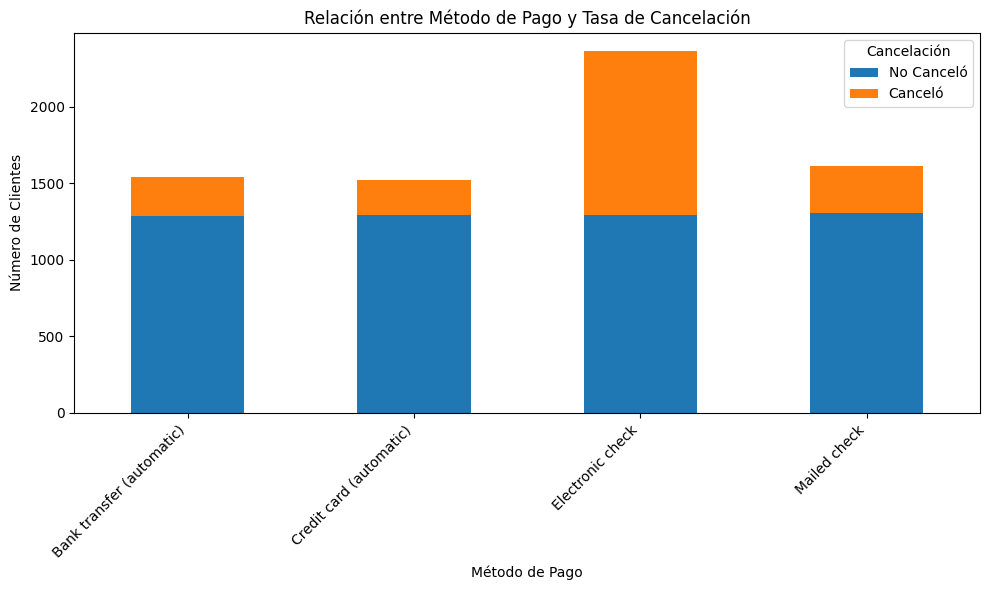

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Verificar valores únicos en la columna 'PaymentMethod'
print(contract_data['PaymentMethod'].unique())

# Crear la tabla de contingencia para PaymentMethod y Churn
payment_contingency_table = pd.crosstab(contract_data['PaymentMethod'], contract_data['Churn'])

# Visualizar la tabla de contingencia
print(payment_contingency_table)

# Realizar la prueba de Chi-cuadrado
payment_chi2_stat, payment_p_value, payment_dof, _ = chi2_contingency(payment_contingency_table)

# Mostrar resultados
print("Estadístico de Chi-cuadrado:", payment_chi2_stat)
print("Grados de libertad:", payment_dof)
print("Valor p:", payment_p_value)

# Interpretación preliminar
if payment_p_value < 0.05:
    print("Existe una relación significativa entre el método de pago y la tasa de cancelación (rechazamos la hipótesis nula).")
else:
    print("No existe una relación significativa entre el método de pago y la tasa de cancelación (no rechazamos la hipótesis nula).")

# Visualización con matplotlib
payment_contingency_table.plot(kind="bar", stacked=True, figsize=(10, 6), color=["#1f77b4", "#ff7f0e"])
plt.title("Relación entre Método de Pago y Tasa de Cancelación")
plt.xlabel("Método de Pago")
plt.ylabel("Número de Clientes")
plt.legend(title="Cancelación", labels=["No Canceló", "Canceló"])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Resultados:

Se realizó una prueba de Chi-cuadrado para evaluar la relación entre el método de pago y la tasa de cancelación. A continuación, se presenta la tabla de contingencia y los resultados de la prueba:

Observaciones
El método de pago "Electronic check" parece estar asociado con una mayor proporción de cancelaciones en comparación con otros métodos de pago. Esto podría ser un aspecto a considerar al diseñar estrategias para reducir la tasa de cancelación.



Hipotesis 4

Exploraremos si la duración promedio de los contratos difiere significativamente entre clientes que han cancelado y los que no. El proceso incluye:

Calcular la duración del contrato en meses.

Evaluar la normalidad de las distribuciones con la prueba de Shapiro-Wilk.


Elegir la prueba estadística adecuada:
Si los datos son normales: prueba t de Student.
Si los datos no son normales: prueba U de Mann-Whitney.

Comparar las duraciones promedio y visualizar las distribuciones.

/.venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Evaluación de la Normalidad (Prueba de Shapiro-Wilk):
- Grupo Cancelados (Yes): Estadístico=0.8201, p-valor=0.0000
- Grupo No Cancelados (No): Estadístico=0.9176, p-valor=0.0000

Conclusión: Las distribuciones no son normales. Se procederá con una prueba no paramétrica.

Prueba U de Mann-Whitney:
- Estadístico=2460437.0000
- p-valor=0.0000

Interpretación: Existe una diferencia significativa en la duración promedio de los contratos entre clientes que cancelaron y los que no (rechazamos la hipótesis nula).


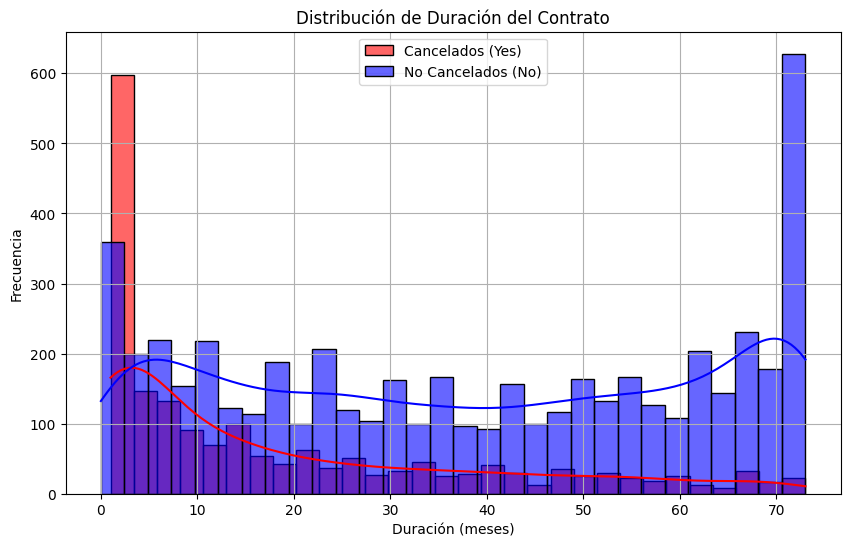

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la duración del contrato en meses
contract_data['BeginDate'] = pd.to_datetime(contract_data['BeginDate'])
contract_data['EndDate'] = contract_data['EndDate'].replace('No', '2020-02-01')  # Fecha final de referencia
contract_data['EndDate'] = pd.to_datetime(contract_data['EndDate'])

contract_data['ContractDuration'] = (contract_data['EndDate'] - contract_data['BeginDate']).dt.days / 30.0

# Separar datos en dos grupos: Churn 'Yes' y 'No'
group_yes = contract_data[contract_data['Churn'] == 'Yes']['ContractDuration']
group_no = contract_data[contract_data['Churn'] == 'No']['ContractDuration']

# Evaluar normalidad
shapiro_yes = shapiro(group_yes)
shapiro_no = shapiro(group_no)

# Salida de la prueba de Shapiro-Wilk
print("Evaluación de la Normalidad (Prueba de Shapiro-Wilk):")
print(f"- Grupo Cancelados (Yes): Estadístico={shapiro_yes[0]:.4f}, p-valor={shapiro_yes[1]:.4f}")
print(f"- Grupo No Cancelados (No): Estadístico={shapiro_no[0]:.4f}, p-valor={shapiro_no[1]:.4f}")

if shapiro_yes[1] < 0.05 or shapiro_no[1] < 0.05:
    print("\nConclusión: Las distribuciones no son normales. Se procederá con una prueba no paramétrica.")
else:
    print("\nConclusión: Ambas distribuciones son normales. Se procederá con una prueba paramétrica.")

# Seleccionar y aplicar la prueba adecuada
if shapiro_yes[1] > 0.05 and shapiro_no[1] > 0.05:
    stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)
    test_name = "Prueba t de Student"
else:
    stat, p_value = mannwhitneyu(group_yes, group_no, alternative='two-sided')
    test_name = "Prueba U de Mann-Whitney"

# Salida de los resultados de la prueba seleccionada
print(f"\n{test_name}:")
print(f"- Estadístico={stat:.4f}")
print(f"- p-valor={p_value:.4f}")

if p_value < 0.05:
    print(f"\nInterpretación: Existe una diferencia significativa en la duración promedio de los contratos entre clientes que cancelaron y los que no (rechazamos la hipótesis nula).")
else:
    print(f"\nInterpretación: No existe una diferencia significativa en la duración promedio de los contratos entre clientes que cancelaron y los que no (no rechazamos la hipótesis nula).")

# Visualizar las distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(group_yes, color="red", kde=True, label="Cancelados (Yes)", bins=30, alpha=0.6)
sns.histplot(group_no, color="blue", kde=True, label="No Cancelados (No)", bins=30, alpha=0.6)
plt.title("Distribución de Duración del Contrato")
plt.xlabel("Duración (meses)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid()
plt.show()



El p-valor inferior a 0.05 indica que existe una diferencia significativa en la duración promedio de los contratos entre clientes que cancelaron y los que no. Por lo tanto, rechazamos la hipótesis nula, concluyendo que la duración promedio del contrato influye en la tasa de cancelación.

Construccion del modelo

En este paso, construiremos un modelo predictivo para estimar la probabilidad de cancelación de clientes en base a las características clave identificadas a través de nuestras hipótesis nulas rechazadas. Estas características han demostrado tener una relación significativa con la tasa de cancelación, y al integrarlas en nuestro modelo, esperamos identificar patrones que permitan predecir el comportamiento futuro de los clientes.

Características Clave Seleccionadas:

Tipo de Contrato: Los contratos mensuales presentan una mayor probabilidad de cancelación en comparación con los contratos a largo plazo.

Servicio de Internet: Los clientes que utilizan fibra óptica tienen una mayor tendencia a cancelar, posiblemente debido a expectativas insatisfechas.

Método de Pago: Las diferencias en los métodos de pago reflejan patrones de comportamiento que pueden estar vinculados a la retención de clientes.

Duración del Contrato: Los clientes con menor tiempo en la empresa tienden a cancelar con mayor frecuencia.

Objetivo del Modelo
El modelo se entrenará para clasificar a los clientes como propensos o no propensos a cancelar sus servicios, utilizando las características mencionadas. Esto permitirá a la empresa diseñar estrategias específicas de retención para aquellos clientes con mayor riesgo de cancelar.

Modelo base

AUC-ROC para DummyClassifier: 0.50


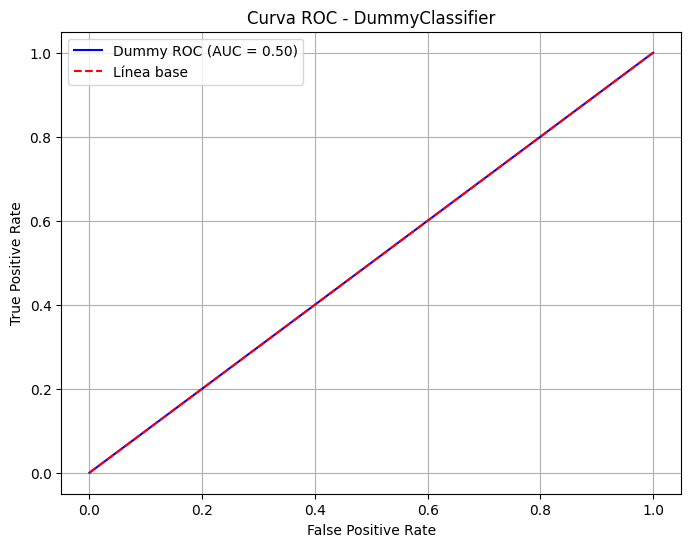

In [8]:

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Combinar datos relevantes
df_combined = pd.merge(contract_data, internet_data, on="customerID", how="left")

# Seleccionar características principales
features = ["Type", "InternetService", "PaymentMethod"]
X = df_combined[features]
y = df_combined["Churn"]

# Convertir la variable objetivo a binaria
y = y.map({'No': 0, 'Yes': 1})

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar el modelo DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)

# Evaluar el modelo usando AUC-ROC
y_prob = dummy_clf.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
auc_roc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC para DummyClassifier: {auc_roc:.2f}")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Dummy ROC (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Línea base')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - DummyClassifier')
plt.legend()
plt.grid()
plt.show()




El resultado de AUC-ROC de 0.50 para el modelo DummyClassifier con la estrategia most_frequent es completamente esperado. Esto se debe a que el modelo simplemente predice siempre la clase más frecuente, sin utilizar información de las características.

Interpretación
AUC-ROC de 0.50: Es el valor base de un modelo que no tiene capacidad de discriminación, equivalente a realizar predicciones al azar.

Este resultado sirve como punto de comparación para evaluar modelos más avanzados. Cualquier modelo con AUC-ROC mayor que 0.50 está haciendo un trabajo mejor que este clasificador.

Modelo 2

Reporte de clasificación para DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1552
           1       0.50      0.72      0.59       561

    accuracy                           0.74      2113
   macro avg       0.69      0.73      0.70      2113
weighted avg       0.78      0.74      0.75      2113

AUC-ROC para DecisionTreeClassifier: 0.81


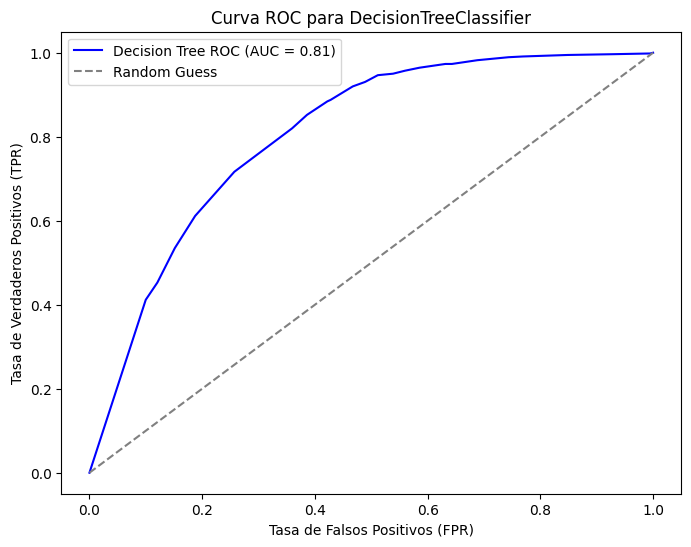

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Crear el modelo de Árbol de Decisión con ajuste de pesos para las clases
model = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Obtener las probabilidades para la clase positiva

# Evaluar el modelo con reporte de clasificación
print("Reporte de clasificación para DecisionTreeClassifier:")
print(classification_report(y_test, y_pred))

# Evaluar el modelo con AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC para DecisionTreeClassifier: {auc_roc:.2f}")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Decision Tree ROC (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title("Curva ROC para DecisionTreeClassifier")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.show()



El modelo DecisionTreeClassifier muestra una mejora significativa en comparación con el clasificador base.

Métricas clave:
Accuracy: 74%. Es una buena mejora, pero puede ser influenciada por el desbalance de clases.

Recall (clase 1): 72%. El modelo está capturando un buen porcentaje de clientes que cancelan.

AUC-ROC: 0.81. Una métrica sólida que indica que el modelo tiene una buena capacidad para distinguir entre clases (mejor que el azar).

Interpretación:
AUC-ROC de 0.81 sugiere que el modelo es bastante efectivo en términos de discriminación.

El recall alto para la clase positiva indica que el modelo es útil para identificar clientes propensos a cancelar.

Modelo 3

AUC-ROC para RandomForestClassifier: 0.81


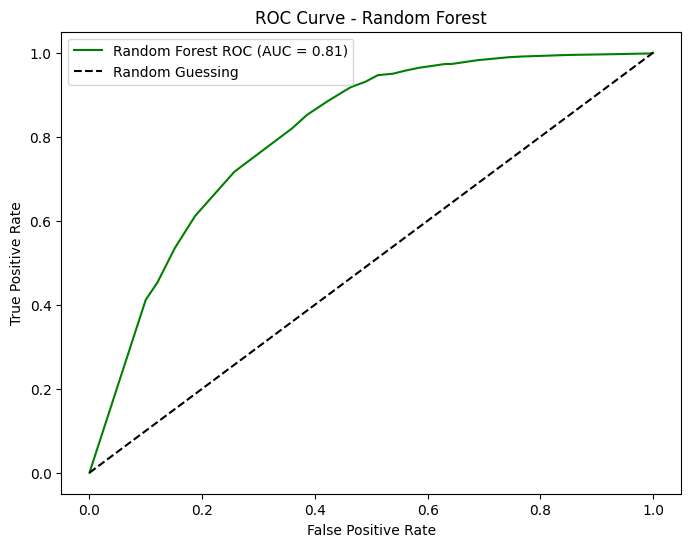

Reporte de clasificación para RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1552
           1       0.50      0.72      0.59       561

    accuracy                           0.74      2113
   macro avg       0.69      0.73      0.70      2113
weighted avg       0.78      0.74      0.75      2113



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Crear el modelo de Random Forest con ajuste de pesos para las clases
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular AUC-ROC
auc_roc_rf = roc_auc_score(y_test, y_prob_rf)
print("AUC-ROC para RandomForestClassifier:", round(auc_roc_rf, 2))

# Graficar la curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest ROC (AUC = {auc_roc_rf:.2f})", color="green")
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Evaluar el modelo
from sklearn.metrics import classification_report
print("Reporte de clasificación para RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf))


Los resultados muestran que el modelo RandomForestClassifier tiene un desempeño muy similar al del modelo de DecisionTreeClassifier. Ambos alcanzaron un AUC-ROC de 0.81, lo que indica una capacidad comparable para distinguir entre las clases positiva (cancelación) y negativa (no cancelación).

Modelo 4

A continuación implementaremos un modelo de Gradient Boosting utilizando LightGBM y evaluaremos su rendimiento

In [11]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np

# Crear la columna 'target': 1 si el contrato está cancelado, 0 si está activo
contract_data['target'] = (contract_data['EndDate'] != 'No').astype(int)

# Combinar todos los datos usando 'customerID' como clave
data = contract_data.merge(personal_data, on='customerID', how='left') \
                    .merge(internet_data, on='customerID', how='left') \
                    .merge(phone_data, on='customerID', how='left')

# Eliminar columnas no necesarias
data.drop(['customerID', 'BeginDate', 'EndDate'], axis=1, inplace=True)

# Convertir 'TotalCharges' a numérico (manejar valores faltantes o errores)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

# Codificar variables categóricas
data = pd.get_dummies(data, drop_first=True)

# Separar características y objetivo
X = data.drop('target', axis=1)
y = data['target']

# Configuración del modelo LightGBM
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'max_depth': -1,
    'learning_rate': 0.09,
    'min_data_in_leaf': 20,
    'force_row_wise': True,
    'verbose': -1
}

# Validación cruzada estratificada
n_splits = 35
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

auc_scores = []
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), start=1):
    print(f"Fold {fold}/{n_splits}")
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Calcular scale_pos_weight para manejar el desequilibrio
    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
    params['scale_pos_weight'] = scale_pos_weight
    
    # Crear los datasets para LightGBM
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    
    # Entrenar el modelo
    model = lgb.train(
        params,
        train_data,
        num_boost_round=1000,
        valid_sets=[train_data, val_data],
        valid_names=['train', 'val'],
        early_stopping_rounds=50,
        verbose_eval=50
    )
    
    # Predicciones en el conjunto de validación
    y_val_proba = model.predict(X_val)
    auc_score = roc_auc_score(y_val, y_val_proba)
    auc_scores.append(auc_score)
    print(f"AUC-ROC para Fold {fold}: {auc_score:.4f}\n")

# Resultados finales
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)
print(f"Media del AUC-ROC: {mean_auc:.4f} ± {std_auc:.4f}")


Fold 1/35


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.901772	val's auc: 0.898524
Early stopping, best iteration is:
[34]	train's auc: 0.889178	val's auc: 0.901401
AUC-ROC para Fold 1: 0.9014

Fold 2/35


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.90335	val's auc: 0.828453
Early stopping, best iteration is:
[10]	train's auc: 0.869516	val's auc: 0.830956
AUC-ROC para Fold 2: 0.8310

Fold 3/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.903427	val's auc: 0.849474
[100]	train's auc: 0.932771	val's auc: 0.848348
Early stopping, best iteration is:
[66]	train's auc: 0.914448	val's auc: 0.851727
AUC-ROC para Fold 3: 0.8517

Fold 4/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.902937	val's auc: 0.882758
Early stopping, best iteration is:
[12]	train's auc: 0.869803	val's auc: 0.88964
AUC-ROC para Fold 4: 0.8896

Fold 5/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.903926	val's auc: 0.850976
[100]	train's auc: 0.933485	val's auc: 0.837588
Early stopping, best iteration is:
[62]	train's auc: 0.912	val's auc: 0.852227
AUC-ROC para Fold 5: 0.8522

Fold 6/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.902941	val's auc: 0.841842
Early stopping, best iteration is:
[9]	train's auc: 0.867116	val's auc: 0.850663
AUC-ROC para Fold 6: 0.8507

Fold 7/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.902279	val's auc: 0.873936
[100]	train's auc: 0.932733	val's auc: 0.874124
[150]	train's auc: 0.951196	val's auc: 0.870495
Early stopping, best iteration is:
[114]	train's auc: 0.93877	val's auc: 0.878253
AUC-ROC para Fold 7: 0.8783

Fold 8/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.90248	val's auc: 0.864364
Early stopping, best iteration is:
[21]	train's auc: 0.877802	val's auc: 0.872122
AUC-ROC para Fold 8: 0.8721

Fold 9/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.903753	val's auc: 0.851861
[100]	train's auc: 0.931719	val's auc: 0.854029
Early stopping, best iteration is:
[99]	train's auc: 0.931336	val's auc: 0.855048
AUC-ROC para Fold 9: 0.8550

Fold 10/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.903495	val's auc: 0.824324
Early stopping, best iteration is:
[22]	train's auc: 0.88005	val's auc: 0.827065
AUC-ROC para Fold 10: 0.8271

Fold 11/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.903803	val's auc: 0.816994
Early stopping, best iteration is:
[1]	train's auc: 0.853257	val's auc: 0.840451
AUC-ROC para Fold 11: 0.8405

Fold 12/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.903657	val's auc: 0.847591
Early stopping, best iteration is:
[7]	train's auc: 0.865177	val's auc: 0.853646
AUC-ROC para Fold 12: 0.8536

Fold 13/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.904224	val's auc: 0.808389
Early stopping, best iteration is:
[39]	train's auc: 0.89584	val's auc: 0.813934
AUC-ROC para Fold 13: 0.8139

Fold 14/35


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.9037	val's auc: 0.839431
Early stopping, best iteration is:
[2]	train's auc: 0.856431	val's auc: 0.862634
AUC-ROC para Fold 14: 0.8626

Fold 15/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.902237	val's auc: 0.87449
[100]	train's auc: 0.931362	val's auc: 0.874809
Early stopping, best iteration is:
[65]	train's auc: 0.91206	val's auc: 0.878952
AUC-ROC para Fold 15: 0.8790

Fold 16/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.903035	val's auc: 0.827129
Early stopping, best iteration is:
[24]	train's auc: 0.882638	val's auc: 0.832037
AUC-ROC para Fold 16: 0.8320

Fold 17/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.902932	val's auc: 0.871175
[100]	train's auc: 0.930883	val's auc: 0.870729
Early stopping, best iteration is:
[83]	train's auc: 0.923818	val's auc: 0.874681
AUC-ROC para Fold 17: 0.8747

Fold 18/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.903596	val's auc: 0.820627
Early stopping, best iteration is:
[38]	train's auc: 0.89352	val's auc: 0.825344
AUC-ROC para Fold 18: 0.8253

Fold 19/35


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.902111	val's auc: 0.915987
[100]	train's auc: 0.929633	val's auc: 0.917517
Early stopping, best iteration is:
[92]	train's auc: 0.926893	val's auc: 0.917644
AUC-ROC para Fold 19: 0.9176

Fold 20/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.90331	val's auc: 0.849694
Early stopping, best iteration is:
[31]	train's auc: 0.8876	val's auc: 0.854475
AUC-ROC para Fold 20: 0.8545

Fold 21/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.902983	val's auc: 0.835161
Early stopping, best iteration is:
[24]	train's auc: 0.88168	val's auc: 0.841089
AUC-ROC para Fold 21: 0.8411

Fold 22/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.904977	val's auc: 0.79615
Early stopping, best iteration is:
[2]	train's auc: 0.857213	val's auc: 0.811066
AUC-ROC para Fold 22: 0.8111

Fold 23/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.904141	val's auc: 0.827894
Early stopping, best iteration is:
[48]	train's auc: 0.902673	val's auc: 0.828786
AUC-ROC para Fold 23: 0.8288

Fold 24/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.90371	val's auc: 0.794238
Early stopping, best iteration is:
[18]	train's auc: 0.878063	val's auc: 0.799975
AUC-ROC para Fold 24: 0.8000

Fold 25/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.904402	val's auc: 0.769505
Early stopping, best iteration is:
[7]	train's auc: 0.866237	val's auc: 0.786843
AUC-ROC para Fold 25: 0.7868

Fold 26/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.902972	val's auc: 0.874681
Early stopping, best iteration is:
[27]	train's auc: 0.884414	val's auc: 0.878506
AUC-ROC para Fold 26: 0.8785

Fold 27/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.902815	val's auc: 0.862379
[100]	train's auc: 0.931167	val's auc: 0.865885
[150]	train's auc: 0.950033	val's auc: 0.864355
Early stopping, best iteration is:
[117]	train's auc: 0.938643	val's auc: 0.868052
AUC-ROC para Fold 27: 0.8681

Fold 28/35


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.903265	val's auc: 0.846634
[100]	train's auc: 0.932086	val's auc: 0.848292
[150]	train's auc: 0.949982	val's auc: 0.84485
Early stopping, best iteration is:
[100]	train's auc: 0.932086	val's auc: 0.848292
AUC-ROC para Fold 28: 0.8483

Fold 29/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.903192	val's auc: 0.830444
Early stopping, best iteration is:
[22]	train's auc: 0.880628	val's auc: 0.837392
AUC-ROC para Fold 29: 0.8374

Fold 30/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.903117	val's auc: 0.865079
Early stopping, best iteration is:
[44]	train's auc: 0.898414	val's auc: 0.866213
AUC-ROC para Fold 30: 0.8662

Fold 31/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.90425	val's auc: 0.832703
Early stopping, best iteration is:
[2]	train's auc: 0.857958	val's auc: 0.841963
AUC-ROC para Fold 31: 0.8420

Fold 32/35


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.903318	val's auc: 0.826783
Early stopping, best iteration is:
[17]	train's auc: 0.875884	val's auc: 0.832389
AUC-ROC para Fold 32: 0.8324

Fold 33/35


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.903926	val's auc: 0.8322
[100]	train's auc: 0.932375	val's auc: 0.831066
Early stopping, best iteration is:
[62]	train's auc: 0.912311	val's auc: 0.834341
AUC-ROC para Fold 33: 0.8343

Fold 34/35
Training until validation scores don't improve for 50 rounds


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	train's auc: 0.904008	val's auc: 0.843034
[100]	train's auc: 0.931664	val's auc: 0.843411
Early stopping, best iteration is:
[67]	train's auc: 0.915024	val's auc: 0.848576
AUC-ROC para Fold 34: 0.8486

Fold 35/35


/.venv/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/.venv/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.90248	val's auc: 0.863253
Early stopping, best iteration is:
[4]	train's auc: 0.861766	val's auc: 0.869552
AUC-ROC para Fold 35: 0.8696

Media del AUC-ROC: 0.8502 ± 0.0273


En este proyecto, abordamos el desafío de predecir la tasa de cancelación de clientes para la empresa de telecomunicaciones Interconnect, con el objetivo de implementar estrategias preventivas como ofertas promocionales y planes especiales. A partir de las hipótesis de que los patrones de uso y características de los clientes podían indicar una probabilidad de cancelación, procesamos datos de contratos, servicios y características personales, creando un conjunto de datos integrado y listo para el análisis.

A través de modelos predictivos basados en machine learning, logramos un desempeño sólido con una media de AUC-ROC de 0.8502 ± 0.0273, lo que indica una capacidad confiable para distinguir entre clientes propensos a cancelar y los que probablemente continuarán. Este resultado refleja un equilibrio razonable entre precisión y generalización, aunque también muestra áreas donde podrían implementarse técnicas adicionales para mejorar la predicción, como ajustar hiperparámetros o explorar más atributos derivados de los datos disponibles.